<a href="https://colab.research.google.com/github/33quitykubby/Rabbit/blob/main/Rabbit_ML_2_LogisticRegression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ロジスティック回帰モデル（分類）

scikit-learnによるロジスティック回帰(写経）
  
1.  model定義    
2.  fit  
3. predict  

TODO


# マウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 日本時間にする

In [2]:
  !rm /etc/localtime
  !ln -s /usr/share/zoneinfo/Asia/Tokyo /etc/localtime
  !date

Sat Apr 10 07:31:33 JST 2021


# ライブラリのインポート

In [3]:
import pandas as pd
import numpy as np
from pandas import DataFrame

from matplotlib import pyplot as plt
import seaborn as sns

#plt.show()しなくてよい
%matplotlib inline

import os
import glob

import librosa

import datetime

import gc

In [4]:
#開始時刻
start_time = datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9)))
print("start_time=",start_time)

start_time= 2021-04-10 07:31:36.861996+09:00


# 乱数シードの初期化






In [5]:
import os 
import numpy as np
from sklearn import model_selection
import tensorflow as tf
import random

COMMON_SEED = 0
STANDARD_SEED = 0
NP_SEED = 0
TF_SEED = 0 

# np.random.seed(STANDARD_SEED)
# random.seed(NP_SEED)
# tf.random.set_seed(TF_SEED)

def seed_everything():
    random.seed(STANDARD_SEED)
    os.environ['PYTHONHASHSEED'] = str(COMMON_SEED)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    np.random.seed(NP_SEED)
    tf.random.set_seed(TF_SEED)
    session_conf = tf.compat.v1.ConfigProto(
        intra_op_parallelism_threads=1,
        inter_op_parallelism_threads=1
    )
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)


In [6]:
#乱数シード固定

seed_everything()

# パス定義

In [7]:
DATA_PATH = '/content/drive/MyDrive/RabbitChallenge/study_ai_ml_google/data/'

# データ読み込み

In [8]:
titanic_df = pd.read_csv(DATA_PATH+'titanic_train.csv')

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 不要データの削除

In [9]:
titanic_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
titanic_df[titanic_df.isnull().any(1)].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
31,1,1,female,NaN,1,0,146.5208,C
32,1,3,female,NaN,0,0,7.7500,Q
36,1,3,male,NaN,0,0,7.2292,C
42,0,3,male,NaN,0,0,7.8958,C


In [11]:
#AgeのNaNを中央値で補完

titanic_df['AgeFill']=titanic_df['Age'].fillna(titanic_df['Age'].mean())

titanic_df[titanic_df.isnull().any(1)].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill
5,0,3,male,NaN,0,0,8.4583,Q,29.699118
17,1,2,male,NaN,0,0,13.0000,S,29.699118
19,1,3,female,NaN,0,0,7.2250,C,29.699118
26,0,3,male,NaN,0,0,7.2250,C,29.699118
28,1,3,female,NaN,0,0,7.8792,Q,29.699118
29,0,3,male,NaN,0,0,7.8958,S,29.699118
31,1,1,female,NaN,1,0,146.5208,C,29.699118
32,1,3,female,NaN,0,0,7.7500,Q,29.699118
36,1,3,male,NaN,0,0,7.2292,C,29.699118
42,0,3,male,NaN,0,0,7.8958,C,29.699118


# ロジスティック回帰（1変数から生死判定）


## sklean利用

In [12]:
#運賃だけのリストを作成

data1 = titanic_df.loc[:,["Fare"]].values

#生死フラグの身のリストを作成

label1 = titanic_df.loc[:,["Survived"]].values

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(data1, label1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
model.predict([[61]])

array([0])

In [15]:
  model.predict_proba([[61]])

array([[0.50358033, 0.49641967]])

In [16]:
print(model.intercept_)

print(model.coef_)

[-0.94131796]
[[0.01519666]]


# ロジスティック回帰（2変数から生死判定）

In [17]:
titanic_df['Gender'] = titanic_df['Sex'].map({'female':0, 'male':1}).astype(int)

titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender
0,0,3,male,22.0,1,0,7.2500,S,22.000000,1
1,1,1,female,38.0,1,0,71.2833,C,38.000000,0
2,1,3,female,26.0,0,0,7.9250,S,26.000000,0
3,1,1,female,35.0,1,0,53.1000,S,35.000000,0
4,0,3,male,35.0,0,0,8.0500,S,35.000000,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,27.000000,1
887,1,1,female,19.0,0,0,30.0000,S,19.000000,0
888,0,3,female,NaN,1,2,23.4500,S,29.699118,0
889,1,1,male,26.0,0,0,30.0000,C,26.000000,1


In [18]:
titanic_df['Pclass_Gender'] = titanic_df['Pclass'] + titanic_df['Gender']

titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender,Pclass_Gender
0,0,3,male,22.0,1,0,7.2500,S,22.000000,1,4
1,1,1,female,38.0,1,0,71.2833,C,38.000000,0,1
2,1,3,female,26.0,0,0,7.9250,S,26.000000,0,3
3,1,1,female,35.0,1,0,53.1000,S,35.000000,0,1
4,0,3,male,35.0,0,0,8.0500,S,35.000000,1,4
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,27.000000,1,3
887,1,1,female,19.0,0,0,30.0000,S,19.000000,0,1
888,0,3,female,NaN,1,2,23.4500,S,29.699118,0,3
889,1,1,male,26.0,0,0,30.0000,C,26.000000,1,2


In [19]:
#それぞれ別の変数に代用されているので不要な列をdrop
titanic_df = titanic_df.drop(['Pclass','Sex','Gender','Age'],axis=1)

titanic_df


,Survived,SibSp,Parch,Fare,Embarked,AgeFill,Pclass_Gender
0,0,1,0,7.2500,S,22.000000,4
1,1,1,0,71.2833,C,38.000000,1
2,1,0,0,7.9250,S,26.000000,3
3,1,1,0,53.1000,S,35.000000,1
4,0,0,0,8.0500,S,35.000000,4
...,...,...,...,...,...,...,...
886,0,0,0,13.0000,S,27.000000,3
887,1,0,0,30.0000,S,19.000000,1
888,0,1,2,23.4500,S,29.699118,3
889,1,0,0,30.0000,C,26.000000,2


## グラフ化

縦軸にPclass_Gender  
横軸にAgeFill

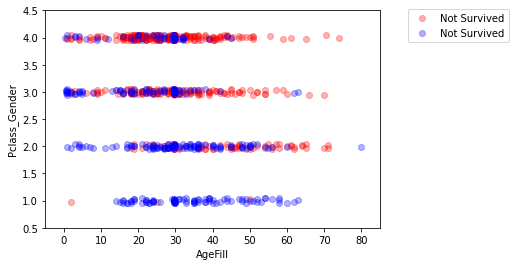

In [20]:
np.random.seed = 0

xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5

index_suvived = titanic_df[titanic_df['Survived']==0].index
index_notsurvived = titanic_df[titanic_df['Survived']==1].index


from matplotlib.colors import ListedColormap
fig, ax = plt.subplots()
cm = plt.cm.RdBu

cm_bright = ListedColormap('#FF0000', '#0000FF')
sc = ax.scatter(titanic_df.loc[index_suvived, 'AgeFill'],
                titanic_df.loc[index_suvived, 'Pclass_Gender']+(np.random.rand(len(index_suvived))-0.5)*0.1,
                color='r',
                label = 'Not Survived',
                alpha=0.3)

sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b',
                label = 'Not Survived',
                alpha=0.3)

ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(bbox_to_anchor=(1.4,1.03))






## sklean利用

In [21]:
#データ抽出

data2 = titanic_df.loc[:,["AgeFill","Pclass_Gender"]].values

data2

array([[22.        ,  4.        ],
       [38.        ,  1.        ],
       [26.        ,  3.        ],
       ...,
       [29.69911765,  3.        ],
       [26.        ,  2.        ],
       [32.        ,  4.        ]])

In [22]:
#ラベル抽出

label2 = titanic_df.loc[:,["Survived"]].values

# label2

In [23]:
model2 = LogisticRegression()

model2.fit(data2, label2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
#年齢 10歳、クラス1 -> 生き残る
model2.predict([[10,1]])

array([1])

### グラフ化（学習結果反映）

縦軸にPclass_Gender  
横軸にAgeFill

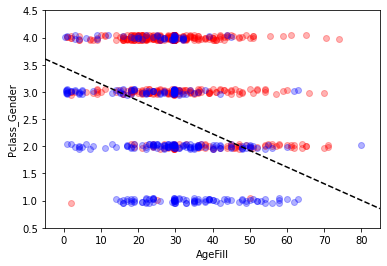

In [25]:
np.random.seed = 0

xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5

index_suvived = titanic_df[titanic_df['Survived']==0].index
index_notsurvived = titanic_df[titanic_df['Survived']==1].index


from matplotlib.colors import ListedColormap
fig, ax = plt.subplots()
cm = plt.cm.RdBu

cm_bright = ListedColormap('#FF0000', '#0000FF')
sc = ax.scatter(titanic_df.loc[index_suvived, 'AgeFill'],
                titanic_df.loc[index_suvived, 'Pclass_Gender']+(np.random.rand(len(index_suvived))-0.5)*0.1,
                color='r',
                label = 'Not Survived',
                alpha=0.3)

sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b',
                label = 'Not Survived',
                alpha=0.3)

ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# ax.legend(bbox_to_anchor=(1.4,1.03))

x1 = xmin
x2 = xmax
y1 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmin)/model2.coef_[0][1]
y2 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmax)/model2.coef_[0][1]
ax.plot([x1,x2], [y1,y2],'k--')
#この線より下は生き残る







## numpy利用

識別モデルとして$p(\boldsymbol{x}; \boldsymbol{w}) = \sigma (\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x})$を用いる。  


$L(\boldsymbol{w}) = \prod_{i=1}^{n} p(\boldsymbol{x}_{i}, \boldsymbol{w})^{y_{i}} (1 - p(\boldsymbol{x}_{i}, \boldsymbol{w}))^{1 - y_{i}}$

負の対数尤度関数は

$- \log{L(\boldsymbol{w})} = - \sum_{i=1}^{n} \left[ y_{i} \log{p( \boldsymbol{x}_{i}, \boldsymbol{w})} + (1 - y_{i}) \log{(1 - p(\boldsymbol{x}_{i}, \boldsymbol{w}))} \right]$

のように書ける。 これを最小化する$\boldsymbol{w}$を求める。


この式が$0$となる$\boldsymbol{w}$は解析的に求められないので、今回は$-\log{L(\boldsymbol{w})}$の最小化問題を最急降下法を用いて解く。

最急降下法では学習率を$\eta$とすると、以下の式で$\boldsymbol{w}$を更新する。

$\boldsymbol{w} \leftarrow \boldsymbol{w} - \eta \frac{\partial }{\partial \boldsymbol{w}} (-\log{L(\boldsymbol{w})})$

### 学習  

後半50個を除いて学習データとする

In [26]:
def add_one(x):
    return np.concatenate([np.ones(len(x))[:, None], x], axis=1)

In [29]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [34]:
print(data2.shape)
print(data2.shape[1])
print(data2[0:10])

#SGD関数の定義
def SGD(X_train, y, max_itr, eta):
  print("X_train len=",len(X_train))
  w = np.zeros(X_train.shape[1]) #学習データの要素数分の配列
  for _ in range(max_itr):
    # print(w)
    w_prev = w.copy()
    p = sigmoid(np.dot(X_train, w))

    y2 = np.reshape(y, (len(y), ))
    b = p-y2

    grad = np.dot(X_train.T, b)
    w -= eta * grad

    if np.allclose(w, w_prev):
      print("allclose")
      return w

  return w

# 学習データに1の列を追加
X_train = add_one(data2)

max_iter=5000 #このくらい回さないとただしげな結果がでなかった
eta = 0.01
w = SGD(X_train[:-50], label2[:-50], max_iter, eta)

print(w)

(891, 2)
2
[[22.          4.        ]
 [38.          1.        ]
 [26.          3.        ]
 [35.          1.        ]
 [35.          4.        ]
 [29.69911765  4.        ]
 [54.          2.        ]
 [ 2.          4.        ]
 [27.          3.        ]
 [14.          2.        ]]
X_train len= 841


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[1833.93139583  -18.50743223 -609.23087613]


### 検証

後半の50個のデータで検証してみる

In [36]:
# 学習データの一部

X_test = add_one(data2[-50:])

proba = sigmoid(np.dot(X_test, w))

print(proba)

y_pred = (proba > 0.5).astype(np.int)

print("predict=",y_pred)

#ラベル
label_valid = np.reshape(label2[-50:], (len(label2[-50:]), ))
print("label  =",label_valid)

[1.27835412e-126 1.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 4.51380560e-223
 1.00000000e+000 9.40051811e-295 0.00000000e+000 2.34628644e-070
 1.00000000e+000 4.33849859e-087 1.07473103e-142 1.00000000e+000
 2.36379389e-143 6.38624573e-191 0.00000000e+000 0.00000000e+000
 8.28462216e-167 1.00000000e+000 9.94457525e-237 6.38624573e-191
 5.16048889e-071 1.00000000e+000 1.00000000e+000 0.00000000e+000
 9.40051811e-295 0.00000000e+000 1.00000000e+000 9.91201877e-001
 0.00000000e+000 1.00000000e+000 1.39420575e-118 0.00000000e+000
 0.00000000e+000 0.00000000e+000 1.00000000e+000 1.00000000e+000
 0.00000000e+000 7.59621088e-175 4.51380560e-223 0.00000000e+000
 0.00000000e+000 4.92287201e-215 1.00000000e+000 9.94457525e-237
 1.00000000e+000 0.00000000e+000]
predict= [0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0]
label  = [0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [41]:
# 正解率、再現率、適合率を確認

TP = 0
FP = 0
FN = 0
TN = 0

for i in range(len(label_valid)):
  if label_valid[i] == 1:
    if label_valid[i] == y_pred[i]:
      TP += 1
    else:
      FN += 1
  else:
    if label_valid[i] == y_pred[i]:
      TN += 1
    else:
      FP += 1

Accuracy = (TP + TN) / (TP + FN + FP + TN)

print("TP={},FN={},FP={},TN={},Accuracy={}".format(TP, FN, FP, TN, Accuracy))

Recall = TP / (TP + FN)

print("TP={},FN={},Recall={}".format(TP, FN, Recall))

Precision = TP / (TP + FP)

print("TP={},FP={},Precision={}".format(TP, FP, Precision))



TP=12,FN=6,FP=2,TN=30,Accuracy=0.84
TP=12,FN=6,Recall=0.6666666666666666
TP=12,FP=2,Precision=0.8571428571428571


# 終わり

In [32]:
#終了時刻
finish_time = datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9)))
print("finish_time=",finish_time)
print("total_time=",finish_time-start_time)


finish_time= 2021-04-10 07:32:38.021440+09:00
total_time= 0:01:01.159444
